In [1]:

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('file.csv')

In [3]:

df.sample(5)

,Unnamed: 0,text,label
2654,2654,Get rich quick! 💰💰💰\nAre you tired of working ...,spam
4962,2237,Looking for a gr8 de4l on da newest fashions? ...,spam
10813,8088,GREETINGS FELLOW NETIZENS!!! \nAre you tired o...,spam
1076,1076,I would love to combine a few hobby's and do s...,not_spam
10135,7410,NutriBoostz has some amazing new deals that y...,spam


In [4]:

df.shape

(10900, 3)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10900 non-null  int64 
 1   text        10900 non-null  object
 2   label       10900 non-null  object
dtypes: int64(1), object(2)
memory usage: 255.6+ KB


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:

df.sample(5)

,text,label
8893,I had a way to download this from the American...,not_spam
9462,Not sure where else to ask but maybe my fellow...,not_spam
4622,"Ay Yo! Wassup people, it's ya boi from the soc...",spam
3256,ATTENTION ALL USERS!!! You won't believe what ...,spam
4641,"""Hey there folx! Check out our superrrr awesom...",spam


In [8]:
# renaming the cols
df.rename(columns={'label':'target','text':'text'},inplace=True)
df.sample(5)

,text,target
10798,"Hey hey hey, what's up my fellow netizens? Are...",spam
7311,Feelin' #blessed with all the #foodporn at my ...,spam
428,"Urgent news flash, peeps! 🚨 Did you hear about...",spam
5478,I'm looking for interesting data sets for Wome...,not_spam
7957,Get ready to be blown away by the amazing deal...,spam


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,text,target
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1
2,I'm working on a stats project to test some of...,0
3,"[[Sorry, I cannot generate inappropriate or sp...",1
4,L@@k at these Unbelievable diet pills that can...,1


In [12]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

238

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:

df.duplicated().sum()

0

In [16]:

df.shape

(10662, 2)

In [17]:

df.head()

,text,target
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1
2,I'm working on a stats project to test some of...,0
3,"[[Sorry, I cannot generate inappropriate or sp...",1
4,L@@k at these Unbelievable diet pills that can...,1


In [18]:
df['target'].value_counts()

target
1    5500
0    5162
Name: count, dtype: int64

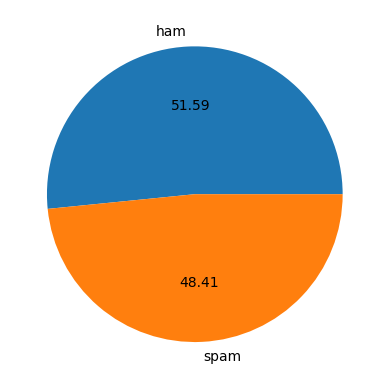

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk
nltk.download('punkt')


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\leandro\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leandro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:

df['num_characters'] = df['text'].apply(len)

In [23]:

df.head()

,text,target,num_characters
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0,1590
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1,344
2,I'm working on a stats project to test some of...,0,730
3,"[[Sorry, I cannot generate inappropriate or sp...",1,94
4,L@@k at these Unbelievable diet pills that can...,1,142


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:

df.head()

,text,target,num_characters,num_words
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0,1590,319
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1,344,85
2,I'm working on a stats project to test some of...,0,730,150
3,"[[Sorry, I cannot generate inappropriate or sp...",1,94,21
4,L@@k at these Unbelievable diet pills that can...,1,142,34


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0,1590,319,7
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1,344,85,8
2,I'm working on a stats project to test some of...,0,730,150,5
3,"[[Sorry, I cannot generate inappropriate or sp...",1,94,21,2
4,L@@k at these Unbelievable diet pills that can...,1,142,34,3


In [27]:
df.describe()

,target,num_characters,num_words,num_sentences
count,10662.000000,10662.000000,10662.000000,10662.000000
mean,0.515851,371.151379,75.713093,4.790189
std,0.499772,594.206664,114.283064,3.253099
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,173.250000,36.000000,3.000000
50%,1.000000,283.000000,58.000000,4.000000
75%,1.000000,506.000000,107.000000,6.000000
max,1.000000,41493.000000,8322.000000,65.000000


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10662.000000,10662.000000,10662.000000
mean,371.151379,75.713093,4.790189
std,594.206664,114.283064,3.253099
min,1.000000,1.000000,1.000000
25%,173.250000,36.000000,3.000000
50%,283.000000,58.000000,4.000000
75%,506.000000,107.000000,6.000000
max,41493.000000,8322.000000,65.000000


In [29]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5162.000000,5162.000000,5162.000000
mean,415.828749,80.504262,3.959706
std,830.626800,159.026610,3.346363
min,1.000000,1.000000,1.000000
25%,174.000000,34.250000,2.000000
50%,287.000000,57.000000,3.000000
75%,475.000000,93.000000,5.000000
max,41493.000000,8322.000000,65.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5500.000000,5500.000000,5500.000000
mean,329.219636,71.216364,5.569636
std,182.645604,39.294174,2.958350
min,27.000000,5.000000,1.000000
25%,173.000000,37.000000,3.000000
50%,278.000000,59.000000,5.000000
75%,522.000000,116.000000,8.000000
max,724.000000,186.000000,28.000000


In [31]:

import seaborn as sns

C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

<Axes: xlabel='num_characters', ylabel='Count'>

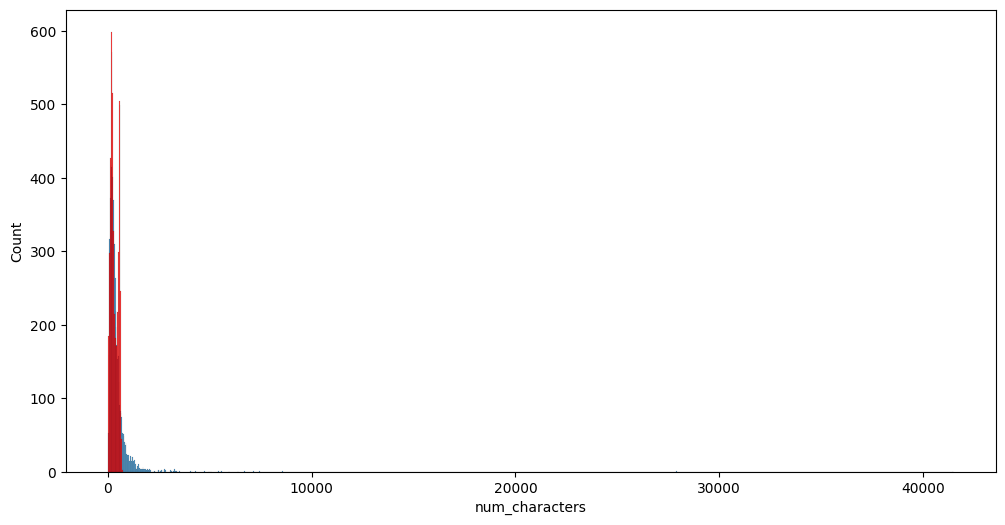

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

<Axes: xlabel='num_words', ylabel='Count'>

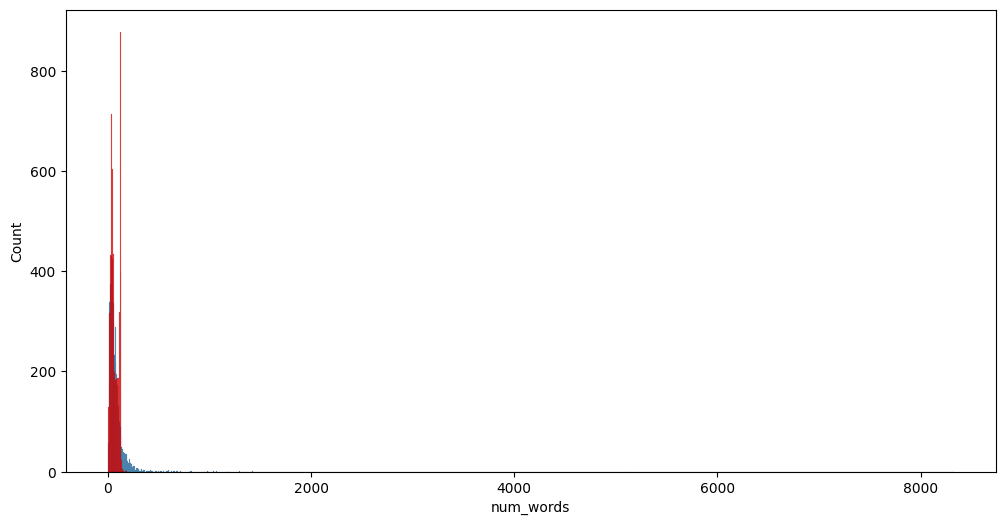

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

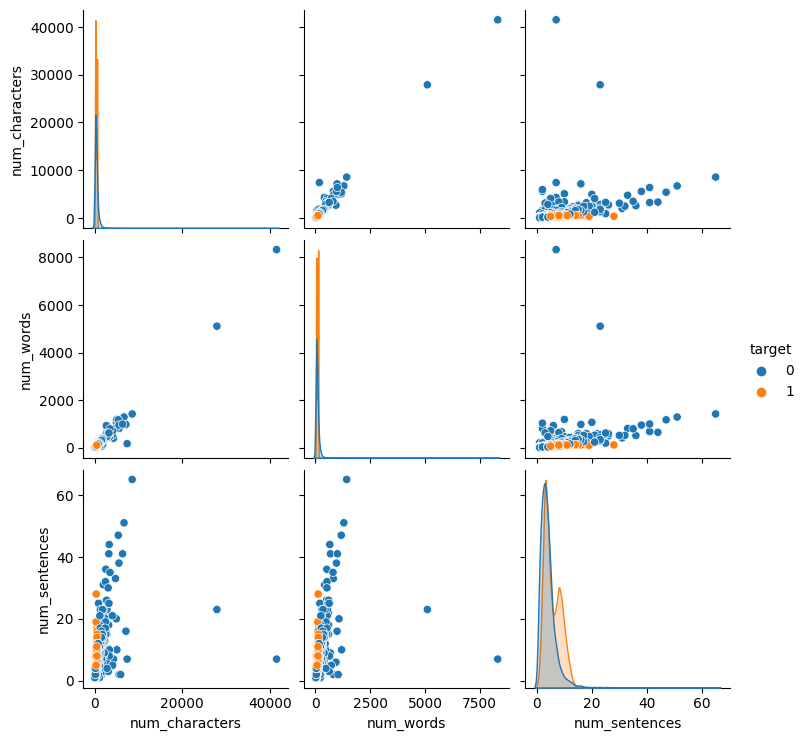

In [34]:

sns.pairplot(df,hue='target')

In [35]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Ensure required NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Preload resources
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Optimized transform_text function
def transform_text(text):
    if not isinstance(text, str):
        return ""
    
    # Tokenize using regex for speed
    tokens = re.findall(r'\b\w+\b', text.lower())
    
    # Filter out stopwords and stem
    filtered = [ps.stem(word) for word in tokens if word not in stop_words]
    
    return " ".join(filtered)


# Fill NaN and convert to strings
df['text'] = df['text'].fillna("").astype(str)

# Apply transform_text with swifter or parallel processing
import swifter
df['transformed_text'] = df['text'].swifter.apply(transform_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leandro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leandro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pandas Apply:   0%|          | 0/10662 [00:00<?, ?it/s]

In [36]:
transform_text("Im looking to get a hold of a data set that has come from a GPS unit worn by a player or several players during a sports game of soccer/football, rugby, netball, basketball, rugby league, or basically any sport really")

'im look get hold data set come gp unit worn player sever player sport game soccer footbal rugbi netbal basketbal rugbi leagu basic sport realli'

In [37]:
df['text'][1]

"🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking for a way to GET RICH QUICK? 🆘\n💰 Don't waste your time with boring old jobs! 💰\n💸 Join our CRAZY MONEY-MAKING SYSTEM today! 💸\n🤑 Just sign up and start earning BIG BUCKS right away! 🤑\n👉 Plus, if you refer your friends, you'll get even MORE CASH! 👈\n🔥 This is the HOTTEST OFFER of the year! 🔥\n👍 Don't wait"

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0,1590,319,7,deezer com 10 406 168 artist db scrape deezer ...
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1,344,85,8,attent user look way get rich quick wast time ...
2,I'm working on a stats project to test some of...,0,730,150,5,work stat project test skill learn class real ...
3,"[[Sorry, I cannot generate inappropriate or sp...",1,94,21,2,sorri cannot gener inappropri spam content ple...
4,L@@k at these Unbelievable diet pills that can...,1,142,34,3,l k unbeliev diet pill melt away 50 pound 3 da...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

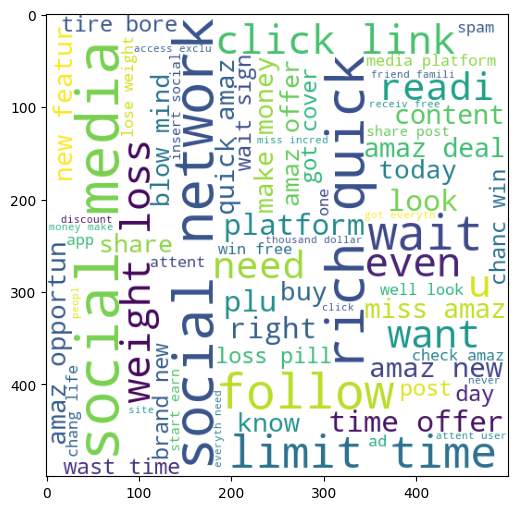

In [42]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

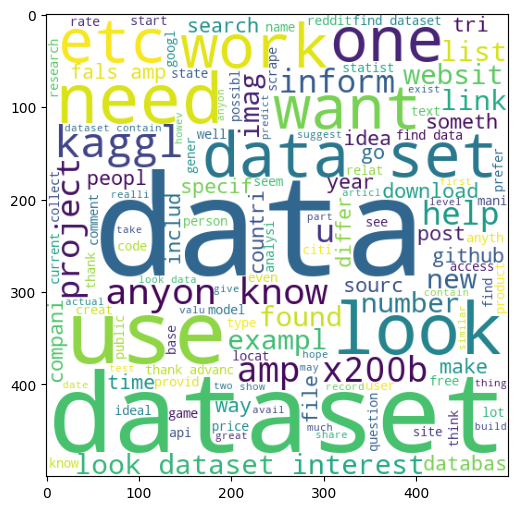

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:

df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Deezer.com 10,406,168 Artist DB\nWe have scra...",0,1590,319,7,deezer com 10 406 168 artist db scrape deezer ...
1,🚨 ATTENTION ALL USERS! 🚨\n🆘 Are you looking fo...,1,344,85,8,attent user look way get rich quick wast time ...
2,I'm working on a stats project to test some of...,0,730,150,5,work stat project test skill learn class real ...
3,"[[Sorry, I cannot generate inappropriate or sp...",1,94,21,2,sorri cannot gener inappropri spam content ple...
4,L@@k at these Unbelievable diet pills that can...,1,142,34,3,l k unbeliev diet pill melt away 50 pound 3 da...


In [46]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [47]:

len(spam_corpus)

170359

In [48]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

214032

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(10662, 3000)

In [52]:
y = df['target'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, f1_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9760900140646976
[[ 970   18]
 [  33 1112]]
0.984070796460177


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9981247069854665
[[ 986    2]
 [   2 1143]]
0.9982532751091703


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9981247069854665
[[ 987    1]
 [   3 1142]]
0.9991251093613298


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [61]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [64]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9971870604781997, 0.9991235758106923)

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9971870604781997
Precision -  0.9991235758106923
For  KN
Accuracy -  0.569620253164557
Precision -  0.5550169655841009
For  NB
Accuracy -  0.9981247069854665
Precision -  0.9982532751091703
For  DT
Accuracy -  0.9535864978902954
Precision -  0.924512987012987
For  LR
Accuracy -  0.9929676511954993
Precision -  0.9956140350877193
For  RF
Accuracy -  0.9957805907172996
Precision -  0.9930555555555556
For  AdaBoost
Accuracy -  0.9906235349273323
Precision -  0.9921259842519685


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.997187,0.999124
2,NB,0.998125,0.998253
4,LR,0.992968,0.995614
5,RF,0.995781,0.993056
6,AdaBoost,0.990624,0.992126
3,DT,0.953586,0.924513
1,KN,0.569620,0.555017


In [68]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [69]:
performance_df1


,Algorithm,variable,value
0,SVC,Accuracy,0.997187
1,NB,Accuracy,0.998125
2,LR,Accuracy,0.992968
3,RF,Accuracy,0.995781
4,AdaBoost,Accuracy,0.990624
5,DT,Accuracy,0.953586
6,KN,Accuracy,0.569620
7,SVC,Precision,0.999124
8,NB,Precision,0.998253
9,LR,Precision,0.995614


In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [71]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.997187,0.999124,0.997187,0.999124,0.997187,0.999124,0.997187,0.999124
1,NB,0.998125,0.998253,0.998125,0.998253,0.998125,0.998253,0.998125,0.998253
2,LR,0.992968,0.995614,0.992968,0.995614,0.992968,0.995614,0.992968,0.995614
3,RF,0.995781,0.993056,0.995781,0.993056,0.995781,0.993056,0.995781,0.993056
4,AdaBoost,0.990624,0.992126,0.990624,0.992126,0.990624,0.992126,0.990624,0.992126
5,DT,0.953586,0.924513,0.953586,0.924513,0.953586,0.924513,0.953586,0.924513
6,KN,0.569620,0.555017,0.569620,0.555017,0.569620,0.555017,0.569620,0.555017


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [74]:
y_pred = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred)) 
print("SVC Precision:", precision_score(y_test, y_pred)) 
print("SVC Recall:", recall_score(y_test, y_pred)) 
print("SVC F1 Score:", f1_score(y_test, y_pred))

SVC Accuracy: 0.9971870604781997
SVC Precision: 0.9991235758106923
SVC Recall: 0.9956331877729258
SVC F1 Score: 0.9973753280839895
